In [1]:
## ---------------------------
##
## WGBS-based validation
##
## comparing the WGBS and RRBS data
##
## Authors: Daria Romanovskaia
##
## Date Created:  2021-05-20
##
##
## ---------------------------

In [2]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))

Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
Warning message:
“package ‘ggseqlogo’ was built under R version 3.6.3”
Warning message:
“package ‘pheatmap’ was built under R version 3.6.3”
Joining, by = "species"



In [3]:
COV=5

In [4]:
wd=file.path(analysis_dir, "validation", "03_WGBS", "03.2_mean_meth")
wd
setwd(wd)

[1] "/binfl/lv71484/droman/DNAmeth500species//results_analysis/validation/03_WGBS/03.2_mean_meth"

# RRBS-WGBS comparison
### Merge all together

In [5]:
files_list <-list.files( pattern = "*.csv")

In [6]:
files_list

[1] "Bos_taurus_GSE147087.csv"               
 [2] "Branchiostoma_lanceolatum_GSE102144.csv"
 [3] "Chelydra_serpentina.csv"                
 [4] "Combined_study_GSE141609.csv"           
 [5] "Crassostrea_gigas_GSE40302.csv"         
 [6] "Danio_rerio_GSE134055.csv"              
 [7] "Danio_rerio_GSE149416.csv"              
 [8] "Gallus_gallus_GSE146620.csv"            
 [9] "Mus_musculus_GSE42836.csv"              
[10] "Parus_major_PRJNA574487.csv"            
[11] "Phascolarctos_cinereus_GSE149600.csv"   
[12] "WGBS_RRBS_summary.csv"                  
[13] "WGBS_summary_tissues.csv"               
[14] "Xenopus_laevis_GSM1977638.csv"          
[15] "Xenopus_laevis_GSM2417228.csv"

In [7]:
files_list <- files_list[!grepl("summary",files_list)]

In [45]:
wgbs_mean = data.table()
for(path in files_list){
    print(path)
    df <- read.csv(path, sep = ";")
    df$source <- gsub(".csv", "",path)
    wgbs_mean <- rbind(df, wgbs_mean, fill = TRUE)
    }


[1] "Bos_taurus_GSE147087.csv"
[1] "Branchiostoma_lanceolatum_GSE102144.csv"
[1] "Chelydra_serpentina.csv"
[1] "Combined_study_GSE141609.csv"
[1] "Crassostrea_gigas_GSE40302.csv"
[1] "Danio_rerio_GSE134055.csv"
[1] "Danio_rerio_GSE149416.csv"
[1] "Gallus_gallus_GSE146620.csv"
[1] "Mus_musculus_GSE42836.csv"
[1] "Parus_major_PRJNA574487.csv"
[1] "Phascolarctos_cinereus_GSE149600.csv"
[1] "Xenopus_laevis_GSM1977638.csv"
[1] "Xenopus_laevis_GSM2417228.csv"


In [46]:
wgbs_mean <- wgbs_mean[, c("path", "mean_ratio", "tissue","replica", "source")]

In [47]:
## clean-up of the tissue types
wgbs_mean[, latin_name:= sapply(wgbs_mean$path, function(x) strsplit(as.character(x), "/")[[1]][5]),]
wgbs_mean[latin_name == "Branchiostoma_lanceolatum_1", latin_name:= "Branchiostoma_lanceolatum",]
wgbs_mean[,tissue:=tolower(tissue),]
wgbs_mean[,tissue:=as.character(sapply(wgbs_mean$tissue, function(x) ifelse(length(grep("brain", x) > 0), "brain", x))),]
wgbs_mean[tissue == "frontal_cortex",tissue:="brain"]
wgbs_mean[tissue == "cerebellum",tissue:="brain"]
wgbs_mean[tissue == "right_hemisphere_cerebral_lobe",tissue:="brain"]
wgbs_mean[tissue == "olfactory_bulb",tissue:="brain"]  
#wgbs_mean[latin_name == "DNAmeth500species", latin_name:="Chelydra_serpentina" ]

In [51]:
wgbs_mean[source=="Chelydra_serpentina", latin_name := "Chelydra_serpentina"]

In [53]:


wgbs_mean[source=="Parus_major_PRJNA574487", 
          latin_name := "Parus_major"]

In [55]:
wgbs_mean[source== "Danio_rerio_GSE134055", replica:=3,]

In [56]:
wgbs_mean[latin_name== "Branchiostoma_lanceolatum"]

path,mean_ratio,tissue,replica,source,latin_name
<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>
../../resources/WGBS_public/Branchiostoma_lanceolatum/Neural_tube/GSM4209500_mC_NeuralTube_amphioxus.CGmap,0.1802838,neural_tube,1,Combined_study_GSE141609,Branchiostoma_lanceolatum
../../resources/WGBS_public/Branchiostoma_lanceolatum_1/liver/GSM2728830_liver_MethylC_seq.allC.txt,0.2018966,liver,1,Branchiostoma_lanceolatum_GSE102144,Branchiostoma_lanceolatum


In [57]:
wgbs_mean[source == "Chelydra_serpentina"]

path,mean_ratio,tissue,replica,source,latin_name
<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Chelydra_serpentina/heart/H1D.merged.bismark.cov.gz,0.7630092,heart,1,Chelydra_serpentina,Chelydra_serpentina
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Chelydra_serpentina/heart/H2D.merged.bismark.cov.gz,0.7616267,heart,2,Chelydra_serpentina,Chelydra_serpentina
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Chelydra_serpentina/heart/H3D.merged.bismark.cov.gz,0.7633497,heart,3,Chelydra_serpentina,Chelydra_serpentina


In [58]:
wgbs_mean[latin_name=="Danio_rerio",replica:=4]

In [59]:
wgbs_mean[latin_name=="Danio_rerio_gemBS", latin_name:="Danio_rerio",]

In [60]:
wgbs_mean[latin_name=="Branchiostoma_lanceolatum" & source == "Combined_study_GSE141609", replica:=2,]

In [61]:
head(wgbs_mean)

path,mean_ratio,tissue,replica,source,latin_name
<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>
../../resources/WGBS_public/Xenopus_laevis//GSM2417228_xt_xl_st10.5.allC.txt,0.9342186,embryo,1,Xenopus_laevis_GSM2417228,Xenopus_laevis
../../resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5_allCG.txt,0.9320787,embryo,2,Xenopus_laevis_GSM1977638,Xenopus_laevis
../../resources/WGBS_public/Phascolarctos_cinereus/kidney/GSM4505502_WGM145_06_S3_kidney_PC_CpG_report.txt,0.6960289,kidney,1,Phascolarctos_cinereus_GSE149600,Phascolarctos_cinereus
../../resources/WGBS_public/Phascolarctos_cinereus/kidney/GSM4505503_WGM145_08_S4_kidney_Ben_CpG_report.txt,0.6865759,kidney,2,Phascolarctos_cinereus_GSE149600,Phascolarctos_cinereus
../../resources/WGBS_public/Phascolarctos_cinereus/lung/GSM4505504_WGM145_09_S5_lung_PC_CpG_report.txt,0.6868919,lung,1,Phascolarctos_cinereus_GSE149600,Phascolarctos_cinereus
../../resources/WGBS_public/Phascolarctos_cinereus/lung/GSM4505505_WGM145_12_S6_lung_Ben_CpG_report.txt,0.6859269,lung,2,Phascolarctos_cinereus_GSE149600,Phascolarctos_cinereus


In [63]:
unique(wgbs_mean$latin_name)

[1] "Xenopus_laevis"            "Phascolarctos_cinereus"   
 [3] "Parus_major"               "Mus_musculus"             
 [5] "Gallus_gallus"             "Danio_rerio"              
 [7] "Crassostrea_gigas"         "Apis_mellifera"           
 [9] "Branchiostoma_lanceolatum" "Callorhinchus_milii"      
[11] "Lethenteron_camtschaticum" "Monodelphis_domestica"    
[13] "Octopus_bimaculoides"      "Ornithorhynchus_anatinus" 
[15] "Chelydra_serpentina"       "Bos_taurus"

In [32]:
## reading in the matches in the RRBS data

In [64]:
match <- fread(file.path(analysis_dir,  "validation", "03_WGBS","WGBS_RRBS_match.tsv"), 
                 fill = TRUE, header = TRUE, sep = "\t")

In [65]:
tail(match)

genome_db,organism,scientific name,n tisssues,n samples,Individuals,meth call,study link,mean methylation,prediction from sequence,⋯,genome,CG call type,Species,genomeid,description of the suppl file,meth_ratio,comment,genome_to_use,V22,V23
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
LetJap1,lamprey,Lethenteron camtschaticum,1,1,1,yes,GSE141609,yes,yes,⋯,LetJap1.0 (GCA_000466285.1),Cgmap,JL,Combined_study,,,,,NA,NA
Apis_mellifera.GCA_000002195.1.31.dna,honeybee,Apis mellifera,1,1,1,yes,GSE141609,yes,yes,⋯,Apis_mellifera.GCA_000002195.1.31.dna.genome.fa,Cgmap,,Combined_study,,,,,NA,NA
Octopus_bimaculoides.PRJNA270931,octopus,Octopus bimaculoides,2,1,1,yes,GSE141609,yes,yes,⋯,Octopus_bimaculoides.PRJNA270931.dna.toplevel.fa,Cgmap,COC,Combined_study,,,not exact match,,NA,NA
Bl71nemr,lancet 2,Branchiostoma lanceolatum,1,1,1,yes,GSE141609,yes,yes,⋯,Branchiostoma_lanceolatum.BraLan2.dna.toplevel.fa,Cgmap,FLA,Combined_study,,,not exact match,,NA,NA
ASM1885937v1,turtle,Chelydra serpentina,1,3,3,yes,XXX,yes,yes,⋯,ASM1885937v1,cov,CST,Chelydra_serpentina,,,unpublished,https://www.ncbi.nlm.nih.gov/assembly/GCA_018859375.1/,NA,NA
PRJNA574487,great tit,Parus major,1,1,1,yes,XXX,yes,yes,⋯,GCF_001522545.3_Parus_major1.1_genomic,methylbed,GT,Parus_major,,,,,NA,NA


In [66]:
match[,latin_name := sapply(`scientific name`, function(x) paste(strsplit(x, " ")[[1]], collapse = "_")), ]

In [67]:
match[,latin_name :=sapply(latin_name, function(x) paste0(toupper(substr(x, 1,1)), substr(x, 2,nchar(x)))),]

In [68]:
match[latin_name== "Xenopus_laevis", c("latin_name", "Species")]

latin_name,Species
<chr>,<chr>
Xenopus_laevis,


In [69]:
match[latin_name== "Parus_major", c("latin_name", "Species")]

latin_name,Species
<chr>,<chr>
Parus_major,GT


In [70]:
match[latin_name== "Xenopus_laevis", Species:="ALL FROGS",]

In [71]:
# adding frogs for Xenopus

In [72]:
frogs <- unique(stats_annot[grep("frog", stats_annot$English), c("species", "English", "ncbi_name")])

In [73]:
frogs$latin_name <- "Xenopus_laevis"

In [74]:
colnames(frogs)[[1]] <- "Species"

In [75]:
wgbs_mean <- inner_join(wgbs_mean, unique(match[, c("latin_name", "Species")]))

Joining, by = "latin_name"



In [76]:
wgbs_mean[latin_name== "Xenopus_laevis"]$Species

[1] "ALL FROGS" "ALL FROGS"

In [77]:
wgbs_mean[latin_name== "Parus_major"]

path,mean_ratio,tissue,replica,source,latin_name,Species
<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Parus_major_gemBS/extract/SRR2070790_cpg.bed.gz,51.06399,brain,1,Parus_major_PRJNA574487,Parus_major,GT


In [78]:
my_wt(wgbs_mean, "WGBS_mean_per_sample_summary.tsv")

In [79]:
stats_annot_mean_meth  <- stats_annot %>% filter(conversion_type == "converted") %>% group_by(color_class, species, English) %>% 
                summarize(m_rrbs = mean(CpG_meth), min_rrbs =min(CpG_meth), max_rrbs=max(CpG_meth) ) %>% ungroup()

`summarise()` has grouped output by 'color_class', 'species'. You can override using the `.groups` argument.



In [80]:
stats_annot_mean_meth_frogs <- stats_annot %>% filter(species %in% frogs$Species & conversion_type == "converted") %>% group_by(color_class) %>% 
                summarize(m_rrbs = mean(CpG_meth), min_rrbs =min(CpG_meth), max_rrbs=max(CpG_meth) ) %>% ungroup()

In [81]:
head(stats_annot_mean_meth)

color_class,species,English,m_rrbs,min_rrbs,max_rrbs
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Invertebrata,ALO,American lobster,35.203845,35.20385,35.203845
Invertebrata,ASC,Ashy sea cucumber,27.771137,24.34644,31.195838
Invertebrata,ASH,Argentinian shrimp,9.138582,8.23830,9.765251
Invertebrata,AW,Acorn worm,41.031141,37.34728,43.257021
Invertebrata,BLS,Black sea cucumber,20.313412,18.23193,23.473768
Invertebrata,BRS,Brittle star,44.681617,40.58602,51.441010


In [82]:
head(stats_annot_mean_meth_frogs)

color_class,m_rrbs,min_rrbs,max_rrbs
<fct>,<dbl>,<dbl>,<dbl>
Amphibia,83.1444,77.22157,92.21815


In [83]:
stats_annot_mean_meth_frogs$English <- "Clawed frog" ##the English name of the WGBS match
stats_annot_mean_meth_frogs$species <- "ALL FROGS"

In [84]:
stats_annot_mean_meth <- rbind(stats_annot_mean_meth, stats_annot_mean_meth_frogs)

In [85]:
setDT(stats_annot_mean_meth)

In [86]:
setDT(wgbs_mean)

In [87]:
wgbs_mean[Species == "ALL FROGS"]

path,mean_ratio,tissue,replica,source,latin_name,Species
<fct>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>
../../resources/WGBS_public/Xenopus_laevis//GSM2417228_xt_xl_st10.5.allC.txt,0.9342186,embryo,1,Xenopus_laevis_GSM2417228,Xenopus_laevis,ALL FROGS
../../resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5_allCG.txt,0.9320787,embryo,2,Xenopus_laevis_GSM1977638,Xenopus_laevis,ALL FROGS


In [88]:
wgbs_mean <- inner_join(wgbs_mean, stats_annot_mean_meth, by = c("Species" = "species"))
#ordering by evolutionary classes
wgbs_mean$color_class <- factor(wgbs_mean$color_class, levels = names(class_colors))
wgbs_mean <- wgbs_mean[order(color_class), ]
wgbs_mean$Species <- factor(wgbs_mean$Species, levels = unique(wgbs_mean$Species))
wgbs_mean$English <- factor(wgbs_mean$English, levels = unique(wgbs_mean$English))

In [89]:
wgbs_mean[mean_ratio > 1, mean_ratio:=mean_ratio/100]

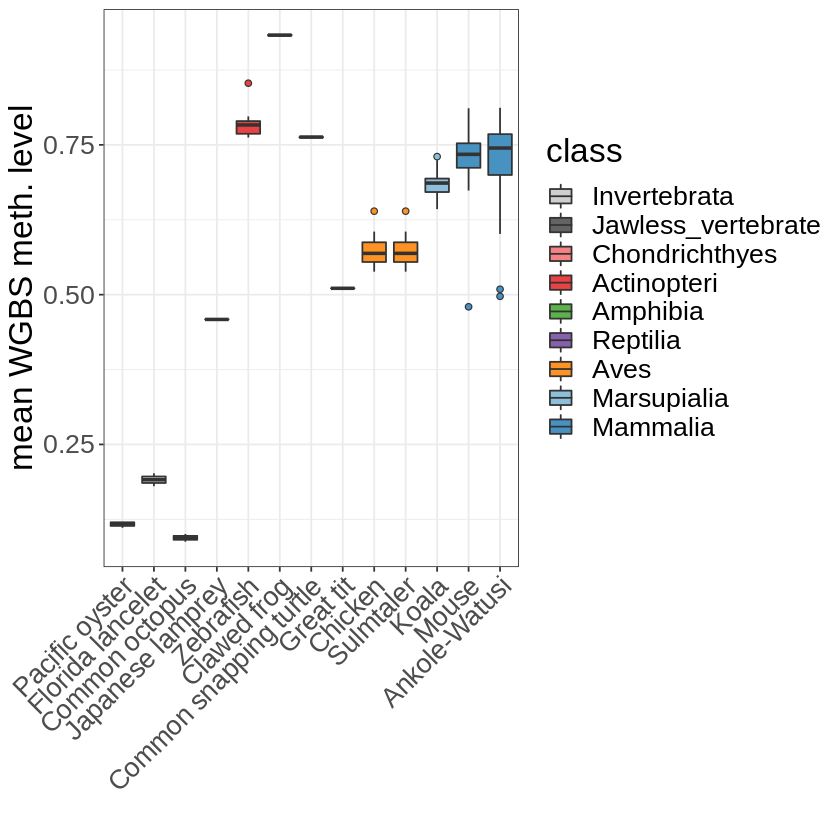

In [90]:
ggplot(wgbs_mean, aes(x = English, y = mean_ratio, fill = color_class)) + geom_boxplot(outlier.shape =  21) + theme_bw() + 
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_manual(values = class_colors) + labs(x = "", y = "mean WGBS meth. level", fill = "class")
ggsave("WGBS_boxplot.pdf", height = 6, width = 8)

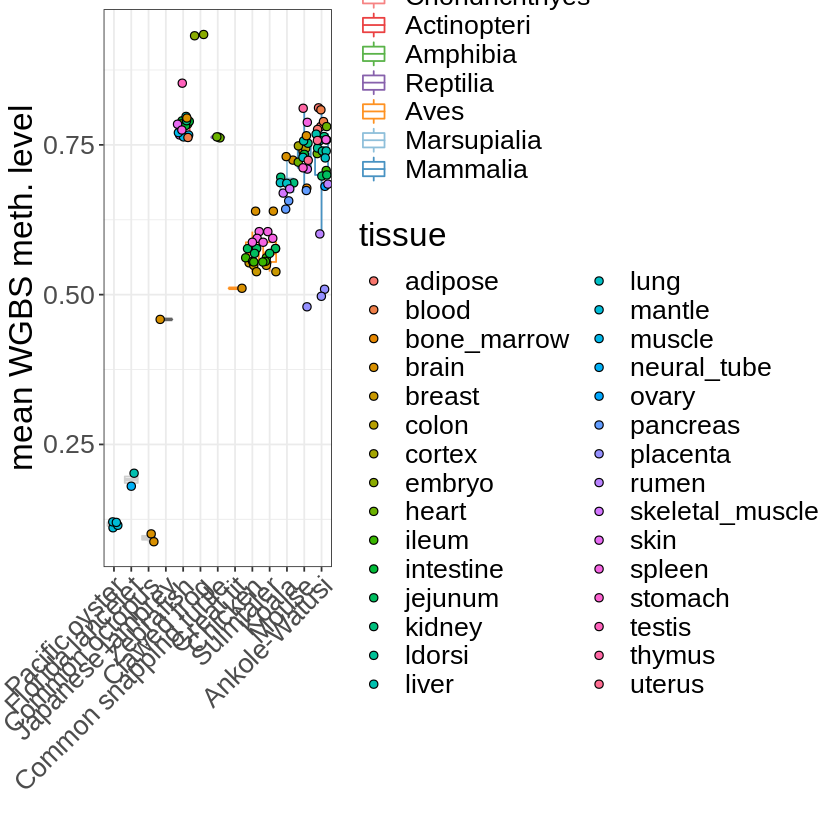

In [91]:
ggplot(wgbs_mean, aes(x = English, y = mean_ratio)) + geom_boxplot(outlier.shape = NA, aes(color = color_class)) + theme_bw() + 
geom_jitter(shape = 21, size = 2,aes(fill = tissue)) + scale_color_manual(values = class_colors) + 
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) + labs(x = "", y = "mean WGBS meth. level", color = "class")
ggsave("WGBS_boxplot_tissue.pdf", height = 8, width = 15)

In [92]:
wgbs_mean_per_tissue <- wgbs_mean %>% group_by(Species, latin_name, tissue, English) %>% summarize(m = mean(mean_ratio))

`summarise()` has grouped output by 'Species', 'latin_name', 'tissue'. You can override using the `.groups` argument.



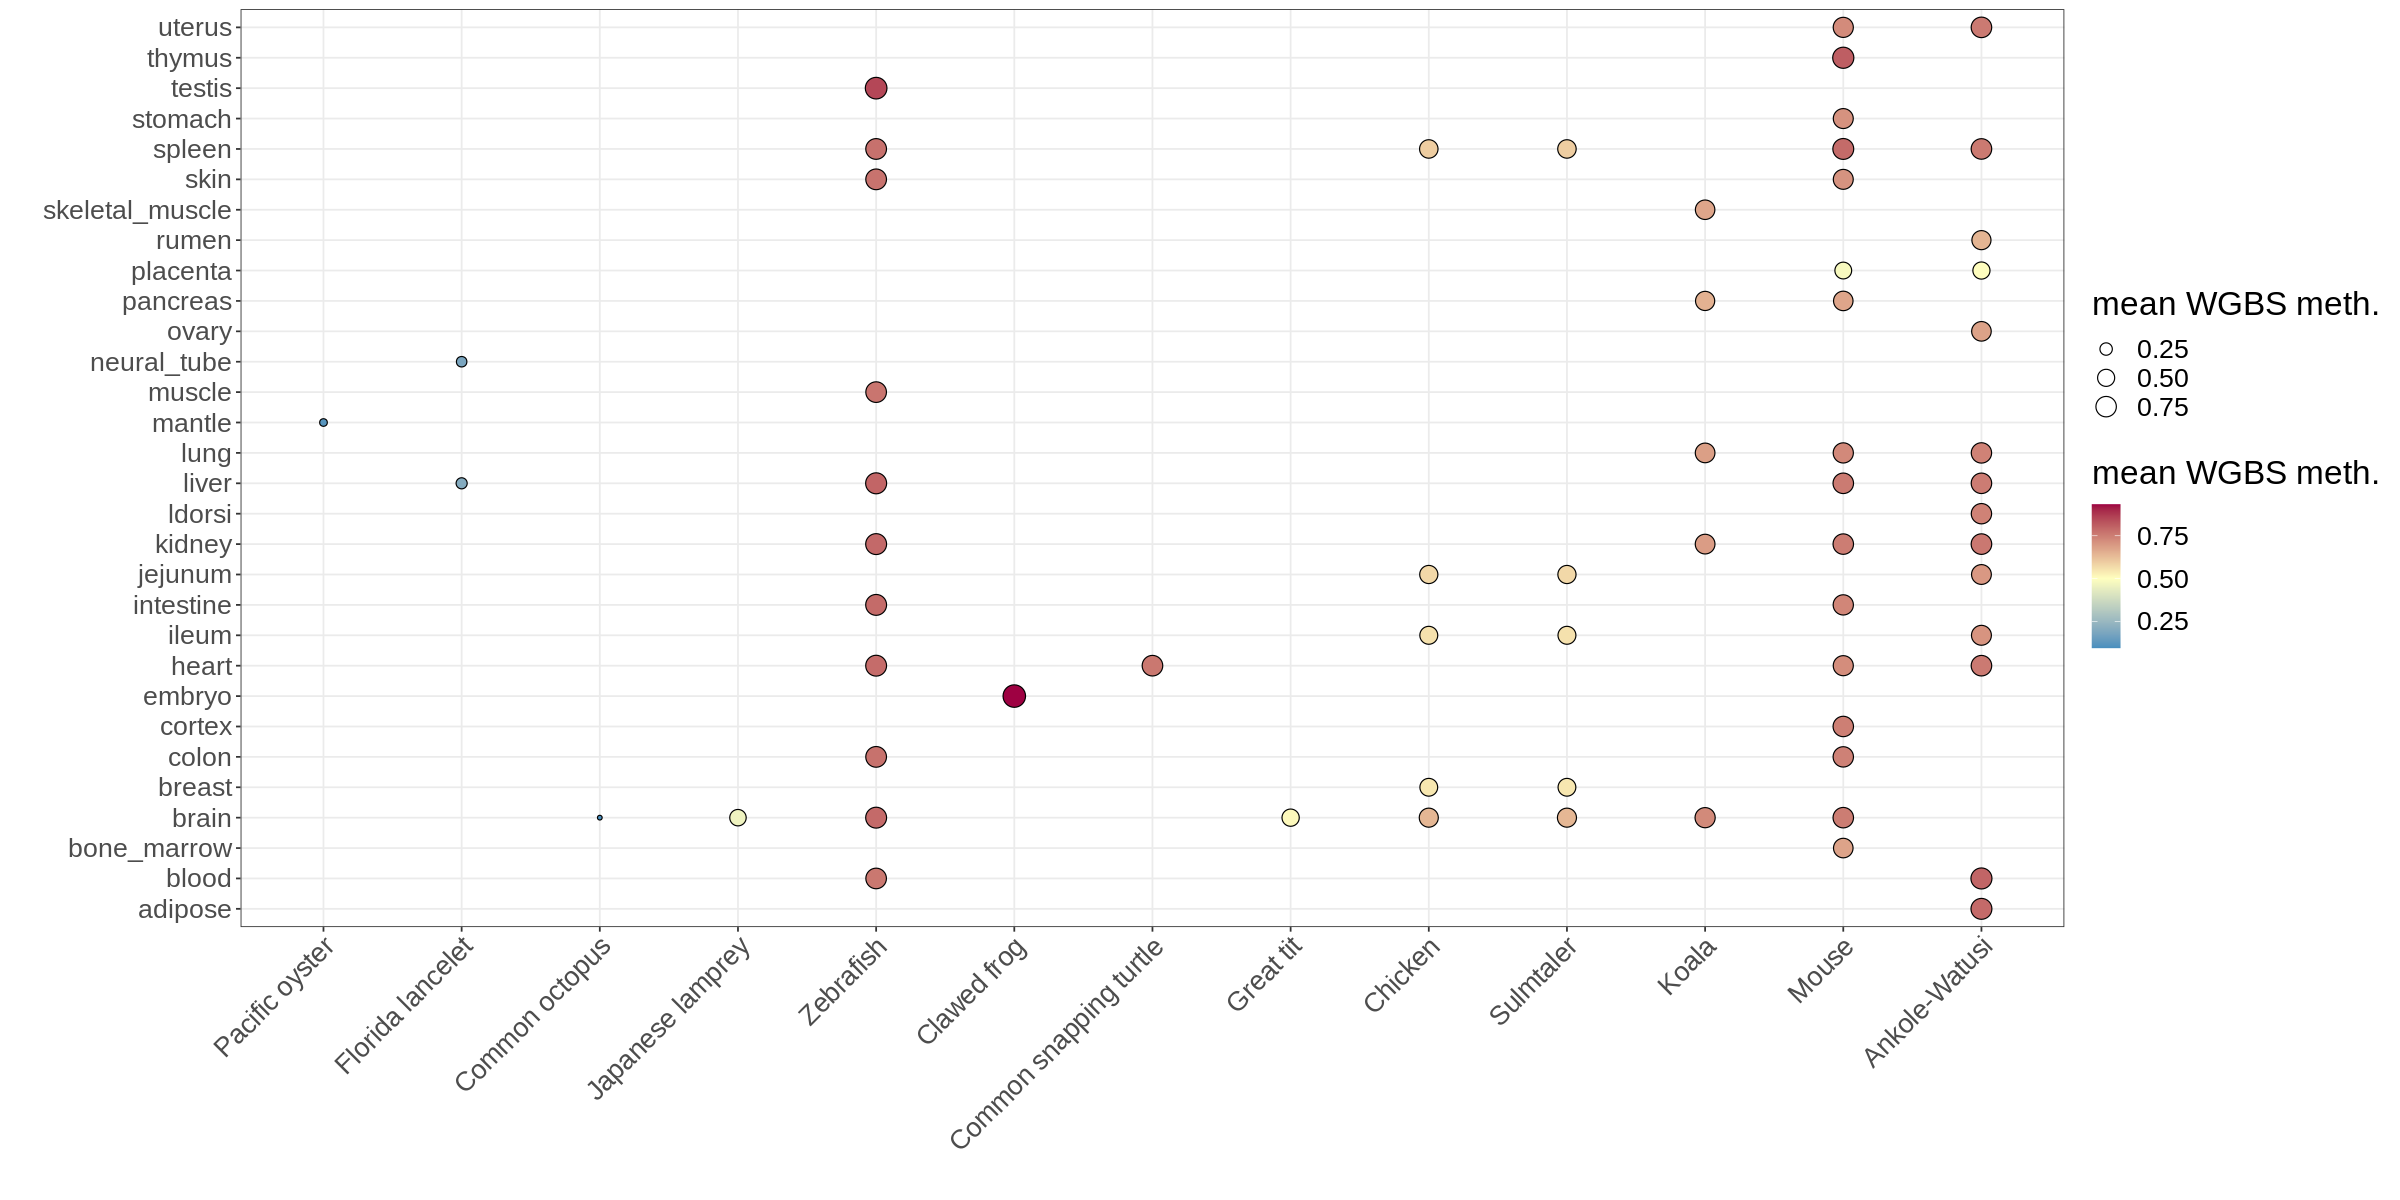

In [93]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(wgbs_mean_per_tissue, aes(x = English, y = tissue,fill = m, size = m)) + geom_point(shape = 21) + 
    theme_bw()+
    theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) + 
    scale_fill_gradient2(low = "#3288bd", mid = "#ffffbf", high = "#9e0142", midpoint = 0.5) + 
    labs(x = "", y = "", fill = "mean WGBS meth.", size = "mean WGBS meth." )
ggsave("WGBS_mean_per_tissue.pdf", height = 10, width = 10)  

In [94]:
wgbs_mean_per_species <- wgbs_mean %>% filter(tissue!= "placenta") %>% group_by(latin_name, Species) %>% summarise(m_wgbs = mean(mean_ratio), min_wgbs = min(mean_ratio),
                                                                                                                   max_wgbs=max(mean_ratio), n = n())

`summarise()` has grouped output by 'latin_name'. You can override using the `.groups` argument.



In [95]:
wgbs_mean_per_species <- inner_join(wgbs_mean_per_species, stats_annot_mean_meth, by = c("Species" = "species"))

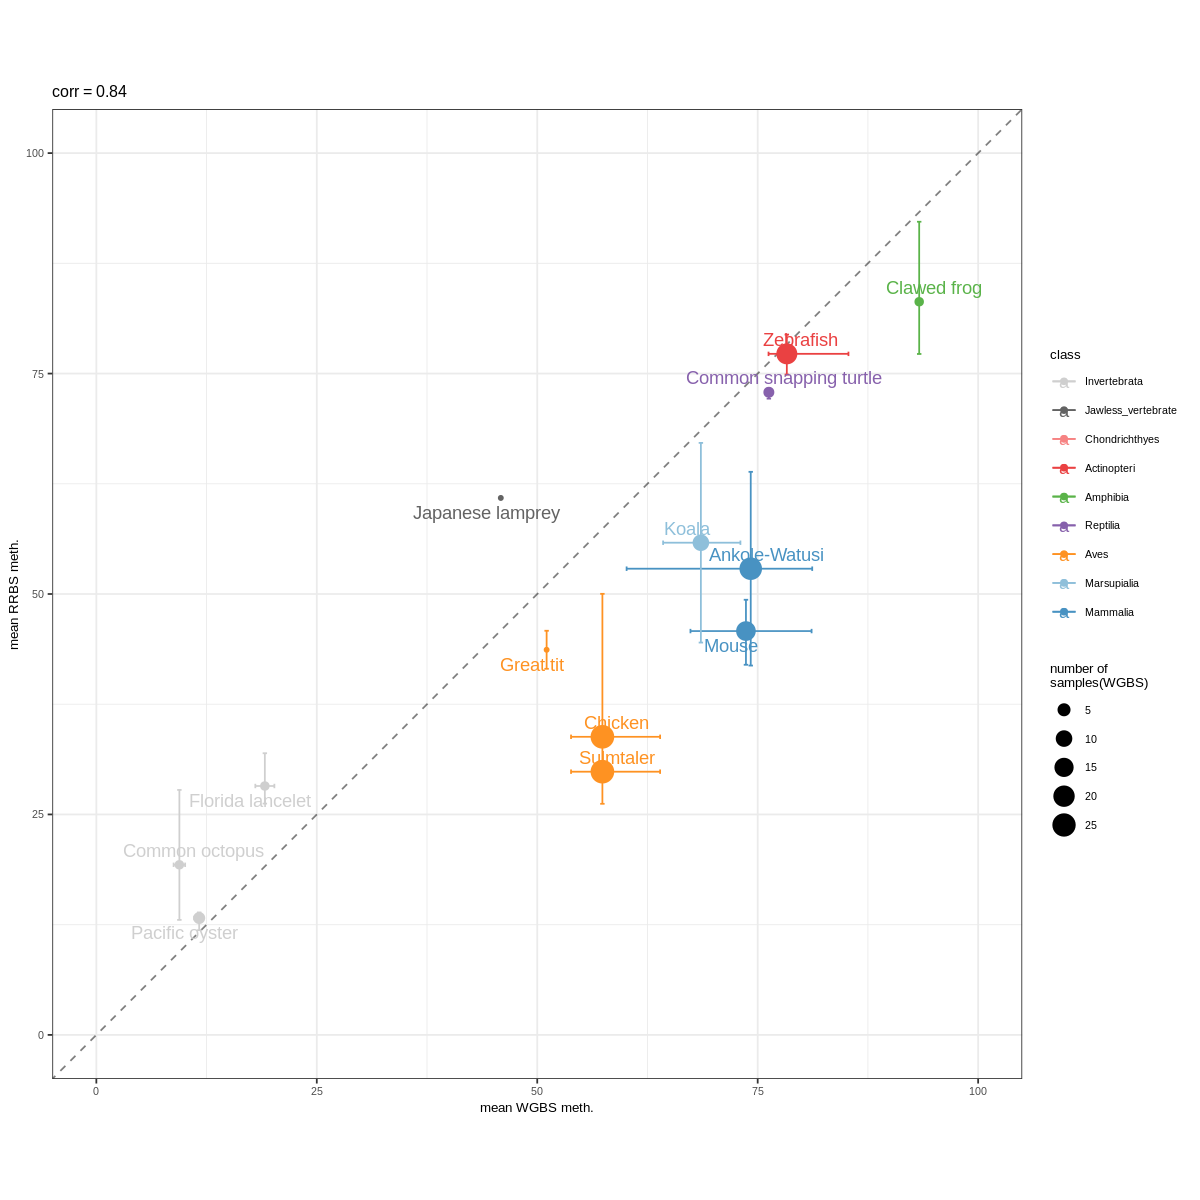

In [96]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(wgbs_mean_per_species, aes(x = m_wgbs*100, y = m_rrbs, color = color_class)) + 
geom_abline(slope = 1, alpha = 0.5, linetype = "dashed") +
geom_point(aes(size = n))  +
theme_bw()+
theme(text = element_text(size = 8)) + 
scale_color_manual(values = class_colors) + 
xlim(c(0,100)) + ylim(c(0,100)) + coord_equal() + 
labs(x = "mean WGBS meth.", y = "mean RRBS meth.", color = "class", size = "number of\nsamples(WGBS)")  + 
ggtitle(paste0("corr = ", round(cor(wgbs_mean_per_species$m_rrbs,wgbs_mean_per_species$m_wgbs),2))) + 
 geom_errorbar(aes(xmin=100*min_wgbs, xmax=100*max_wgbs), width=.5,
                 position=position_dodge(.9)) +
geom_errorbar(aes(ymin=min_rrbs, ymax=max_rrbs), width=.5,
                 position=position_dodge(.9))+ geom_text_repel(aes(label = English))
ggsave("WGBS_RRBS.pdf", height = 4, width = 5) 


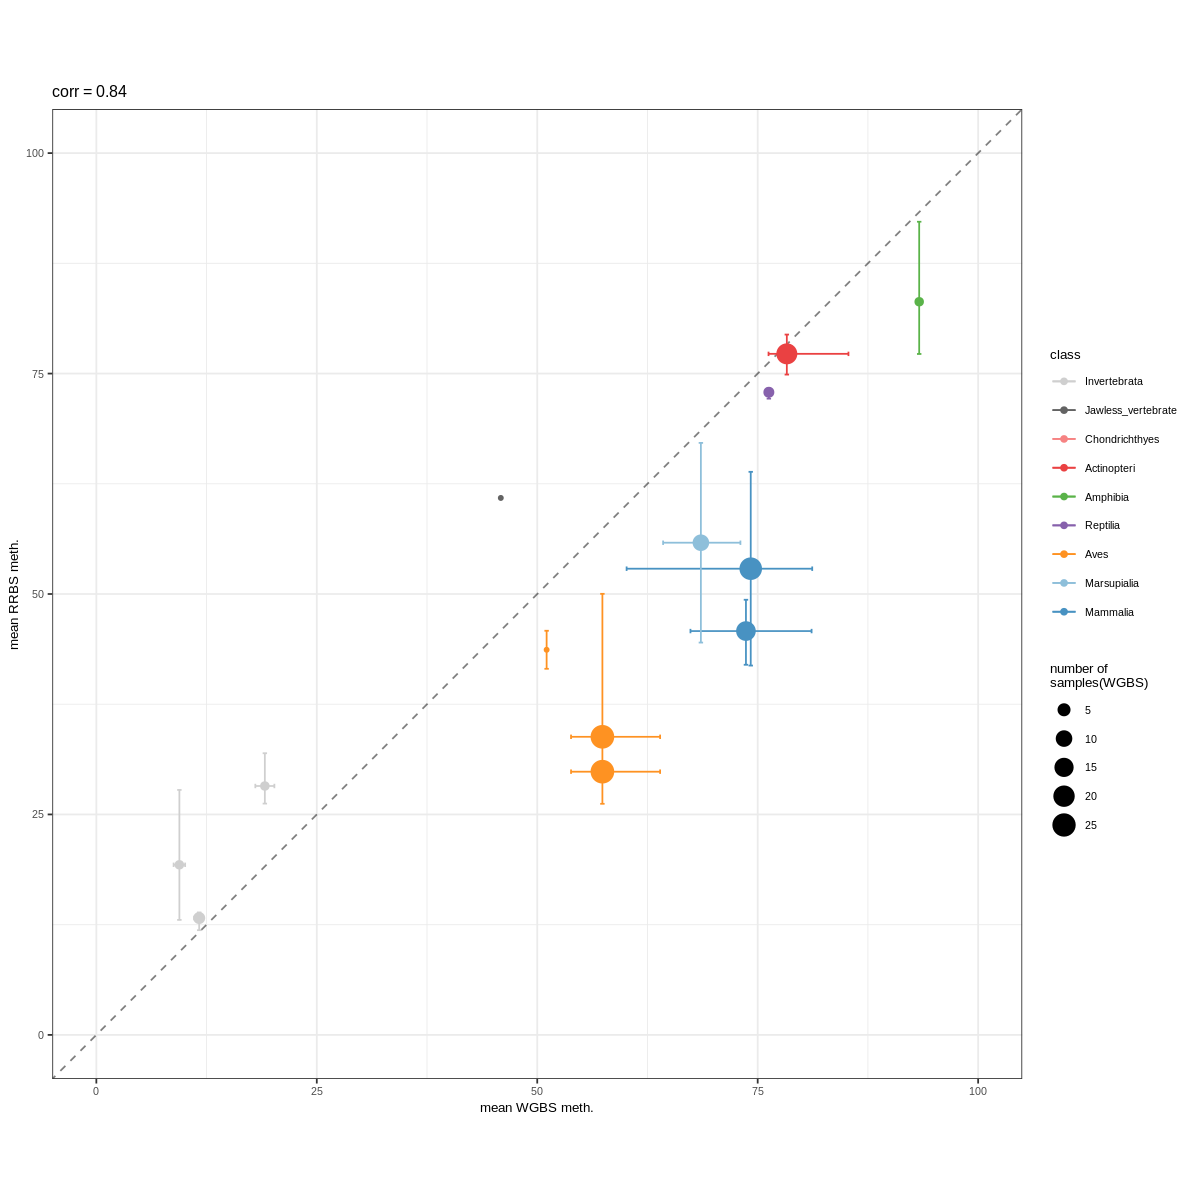

In [97]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(wgbs_mean_per_species, aes(x = m_wgbs*100, y = m_rrbs, color = color_class)) + 
geom_abline(slope = 1, alpha = 0.5, linetype = "dashed") +
geom_point(aes(size = n))  +
theme_bw()+
theme(text = element_text(size = 8)) + 
scale_color_manual(values = class_colors) + 
xlim(c(0,100)) + ylim(c(0,100)) + coord_equal() + 
labs(x = "mean WGBS meth.", y = "mean RRBS meth.", color = "class", size = "number of\nsamples(WGBS)")  + 
ggtitle(paste0("corr = ", round(cor(wgbs_mean_per_species$m_rrbs,wgbs_mean_per_species$m_wgbs),2))) + 
 geom_errorbar(aes(xmin=100*min_wgbs, xmax=100*max_wgbs), width=.5,
                 position=position_dodge(.9)) +
geom_errorbar(aes(ymin=min_rrbs, ymax=max_rrbs), width=.5,
                 position=position_dodge(.9))#+ geom_text_repel(aes(label = English))
ggsave("WGBS_RRBS_nolabels.pdf", height = 6, width = 6) 

In [98]:
my_wt(wgbs_mean_per_tissue, "WGBS_summary_tissues.csv")

In [99]:
my_wt(wgbs_mean_per_species, "WGBS_RRBS_summary.csv")

In [100]:
getwd()

[1] "/binfl/lv71484/droman/DNAmeth500species/results_analysis/validation/03_WGBS/03.2_mean_meth"